<a href="https://colab.research.google.com/github/tlsehdgns1999/java_1/blob/main/%EC%98%88%EB%A6%B0%EC%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] = 'NanumBarunGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
path = '/content/drive/MyDrive/유효data_철강공정 효율화.xlsx'

In [4]:
data = pd.read_excel(path)

In [5]:
new_data = data[data['특허/실용구분'] == '특허등록']
df = new_data[new_data['법적상태'] == '등록']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 2201
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   대분류               1100 non-null   object
 1   중분류               1100 non-null   object
 2   소분류2              1100 non-null   object
 3   국가코드              1100 non-null   object
 4   특허/실용구분           1100 non-null   object
 5   발명의 명칭            1100 non-null   object
 6   대표청구항             1100 non-null   object
 7   요약                1100 non-null   object
 8   독립항               1100 non-null   object
 9   청구항 수             1100 non-null   object
 10  법적상태              1100 non-null   object
 11  심사청구여부(KR,JP,EP)  1100 non-null   object
 12  심사진행상태            1100 non-null   object
 13  출원인               1100 non-null   object
 14  출원인(원문)           1100 non-null   object
 15  출원인 국적            1100 non-null   object
 16  현재권리자             1100 non-null   object
 17  현재권리자 국적      

<ipython-input-7-905ad25e97f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['출원일'] = pd.to_datetime(df['출원일'])


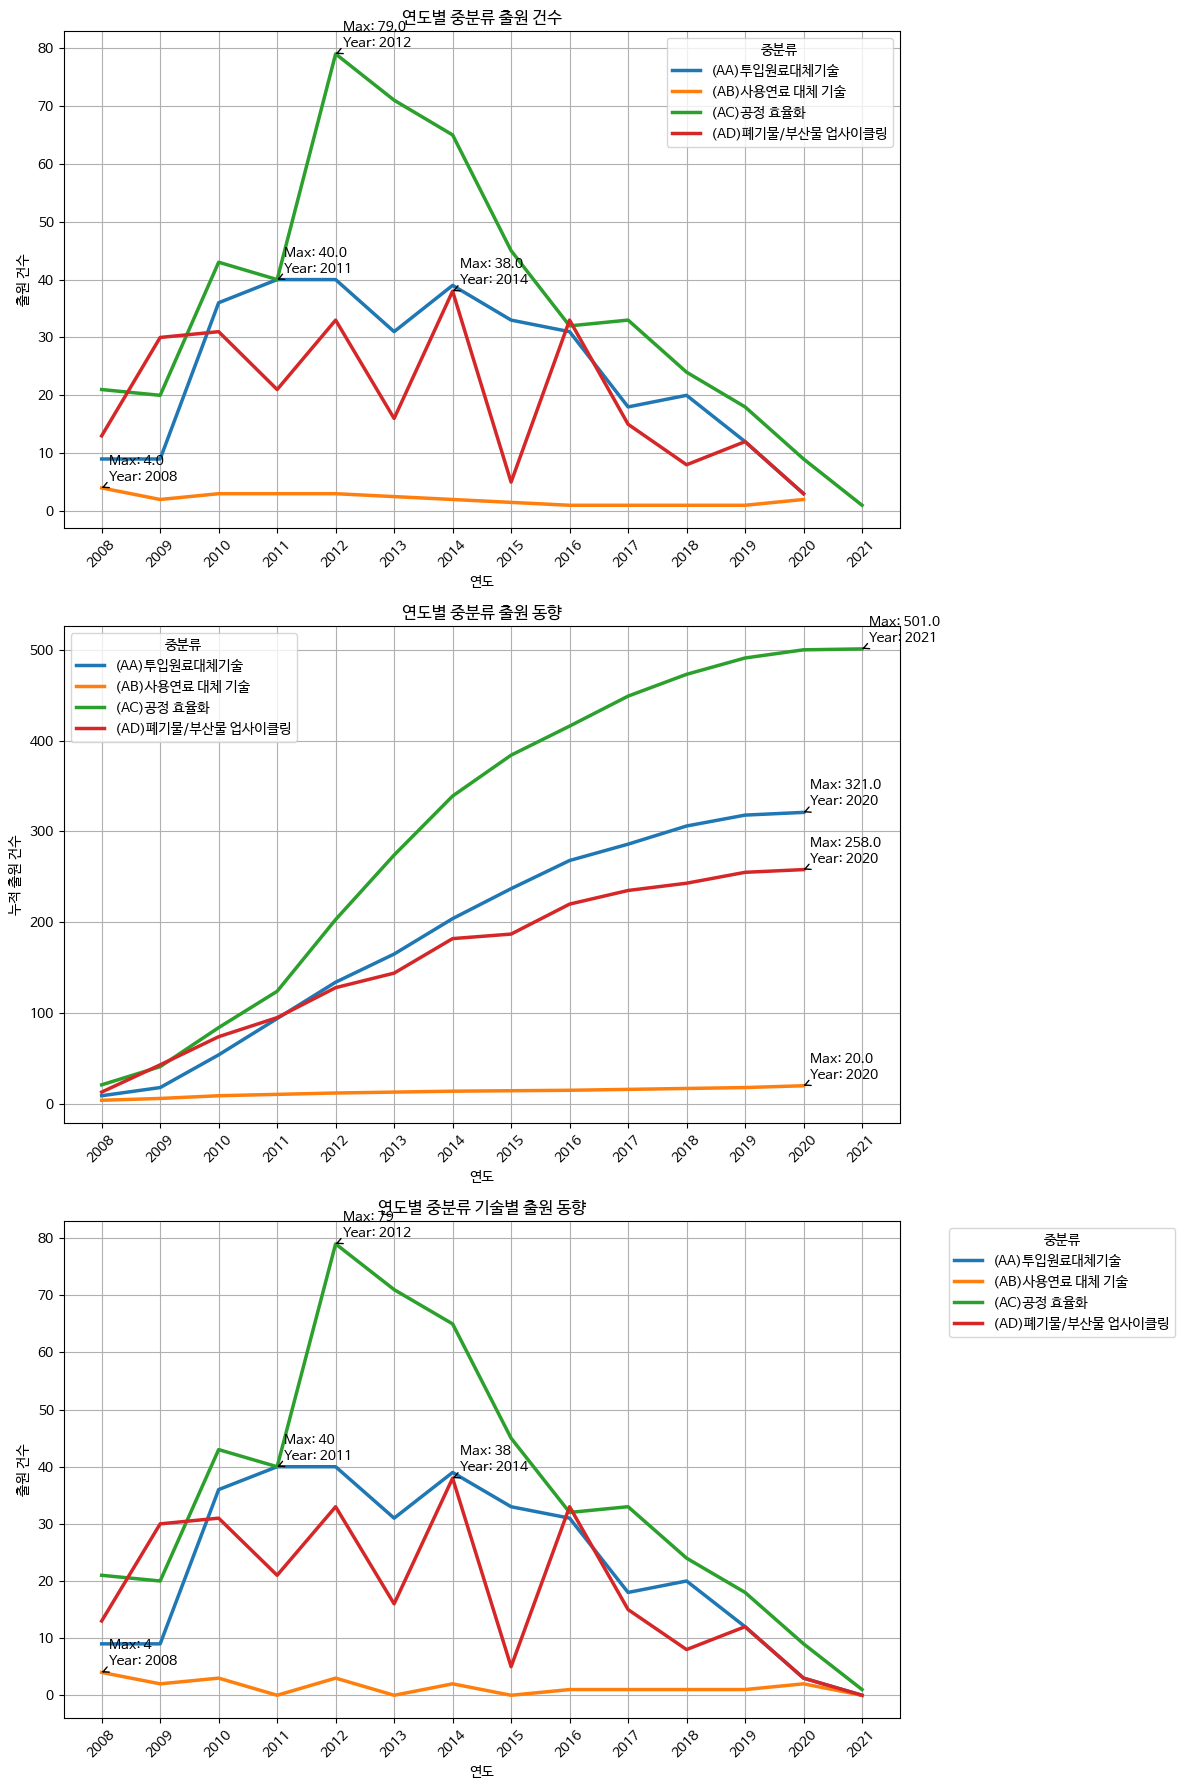

In [7]:
df['출원일'] = pd.to_datetime(df['출원일'])

# 중분류를 기준으로 연도별 출원 건수
pivot_by_year = df.pivot_table(index=df['출원일'].dt.year, columns='중분류', values='출원번호', aggfunc='count')

# 중분류를 기준으로 연도별 출원 동향
pivot_by_year_trend = pivot_by_year.cumsum()

# 중분류를 기준으로 기술별 출원 동향
pivot_by_tech = df.pivot_table(index='중분류', columns=df['출원일'].dt.year, values='출원번호', aggfunc='count', fill_value=0)
pivot_by_tech = pivot_by_tech.transpose()

plt.figure(figsize=(12, 18))

# 연도별 중분류 출원 건수 그래프
plt.subplot(3, 1, 1)
for column in pivot_by_year.columns:
    lineplot = sns.lineplot(data=pivot_by_year[column], label=column, linewidth=2.5)
    max_value = pivot_by_year[column].max()
    max_year = pivot_by_year[column].idxmax()
    lineplot.annotate(f'Max: {max_value}\nYear: {max_year}', xy=(max_year, max_value), xytext=(5,5),
                      textcoords='offset points', arrowprops=dict(arrowstyle='->'))
plt.title('연도별 중분류 출원 건수')
plt.xlabel('연도')
plt.ylabel('출원 건수')
plt.legend(title='중분류')
plt.xticks(rotation=45)
plt.xticks(range(min(df['출원일']).year, max(df['출원일']).year + 1, 1))
plt.grid(True)

# 연도별 중분류 출원 동향 그래프
plt.subplot(3, 1, 2)
for column in pivot_by_year_trend.columns:
    lineplot = sns.lineplot(data=pivot_by_year_trend[column], label=column, linewidth=2.5)
    max_value = pivot_by_year_trend[column].max()
    max_year = pivot_by_year_trend[column].idxmax()
    lineplot.annotate(f'Max: {max_value}\nYear: {max_year}', xy=(max_year, max_value), xytext=(5,5),
                      textcoords='offset points', arrowprops=dict(arrowstyle='->'))
plt.title('연도별 중분류 출원 동향')
plt.xlabel('연도')
plt.ylabel('누적 출원 건수')
plt.legend(title='중분류')
plt.xticks(rotation=45)
plt.xticks(range(min(df['출원일']).year, max(df['출원일']).year + 1, 1))
plt.grid(True)

# 연도별 중분류 기술별 출원 동향 그래프
plt.subplot(3, 1, 3)
for column in pivot_by_tech.columns:
    lineplot = sns.lineplot(data=pivot_by_tech[column], label=column, linewidth=2.5)
    max_value = pivot_by_tech[column].max()
    max_year = pivot_by_tech[column].idxmax()
    lineplot.annotate(f'Max: {max_value}\nYear: {max_year}', xy=(max_year, max_value), xytext=(5,5),
                      textcoords='offset points', arrowprops=dict(arrowstyle='->'))
plt.title('연도별 중분류 기술별 출원 동향')
plt.xlabel('연도')
plt.ylabel('출원 건수')
plt.legend(title='중분류', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.xticks(range(min(df['출원일']).year, max(df['출원일']).year + 1, 1))
plt.grid(True)

plt.tight_layout()
plt.show()

<ipython-input-8-ee502081c87e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['연도'] = df['출원일'].dt.year


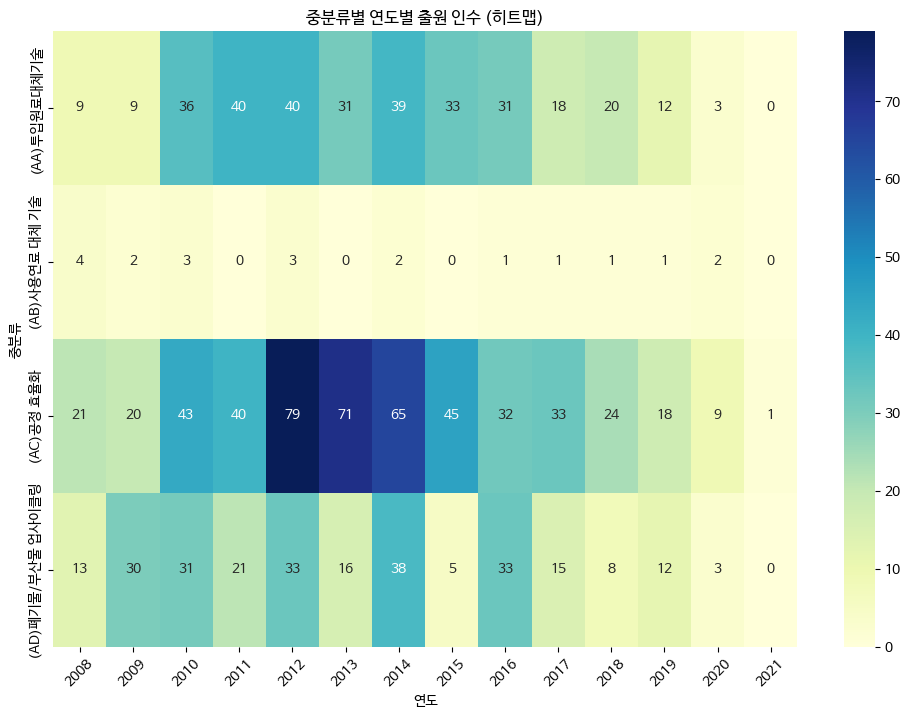

In [8]:
# '출원일' 열에서 연도와 중분류 추출
df['연도'] = df['출원일'].dt.year

# 중분류별 연도별 출원 인수 계산
yearly_applications_by_category = df.groupby(['연도', '중분류'])['출원번호'].count().unstack()

# NaN 값 0으로 대체
yearly_applications_by_category = yearly_applications_by_category.fillna(0)

# 부동소수점 값을 반올림하여 정수로 변환
yearly_applications_by_category = np.round(yearly_applications_by_category).astype(int)

# 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(yearly_applications_by_category.transpose(), cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('중분류별 연도별 출원 인수 (히트맵)')
plt.xlabel('연도')
plt.ylabel('중분류')
plt.xticks(rotation=45)
plt.show()

In [11]:
df['출원인'] = df['출원인'].replace('ALSTOM Technology Ltd', 'ALSTOM TECHNOLOGY LTD')
df['출원인'] = df['출원인'].replace('Alstom Technology Ltd', 'ALSTOM TECHNOLOGY LTD')
df['출원인'] = df['출원인'].replace('Alstom Technology Ltd.', 'ALSTOM TECHNOLOGY LTD')
df['출원인'] = df['출원인'].replace('Alstom Technology Ltd.', 'ALSTOM TECHNOLOGY LTD')

<ipython-input-11-c4db6969d288>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['출원인'] = df['출원인'].replace('ALSTOM Technology Ltd', 'ALSTOM TECHNOLOGY LTD')
<ipython-input-11-c4db6969d288>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['출원인'] = df['출원인'].replace('Alstom Technology Ltd', 'ALSTOM TECHNOLOGY LTD')
<ipython-input-11-c4db6969d288>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [12]:
# 중분류를 기준으로 출원인별로 그룹화하고 각 그룹별로 개수 세기
grouped = df.groupby('중분류')['출원인'].value_counts()

# 그룹별 개수를 기준으로 내림차순 정렬하여 상위 10개 출력
top_10 = grouped.groupby(level=0, group_keys=False).nlargest(10)
print(top_10)

중분류                출원인                                                  
(AA)투입원료대체기술       JFE STEEL CO                                             30
                   주식회사 포스코                                                 25
                   BEIJING SHENWU ENVIRONMENT & ENERGY TECHNOLOGY CO LTD    17
                   NIPPON STEEL ＆ SUMITOMO METAL CO                         11
                   UNIV NORTHEASTERN                                         9
                   Midrex Technologies, Inc.                                 7
                   POSCO                                                     7
                   JFE Steel Corporation                                     5
                   SHENWU TECH GROUP CO LTD                                  5
                   현대제철 주식회사                                                 5
(AB)사용연료 대체 기술     ALSTOM TECHNOLOGY LTD                                     4
                   JFE STEEL CO                           

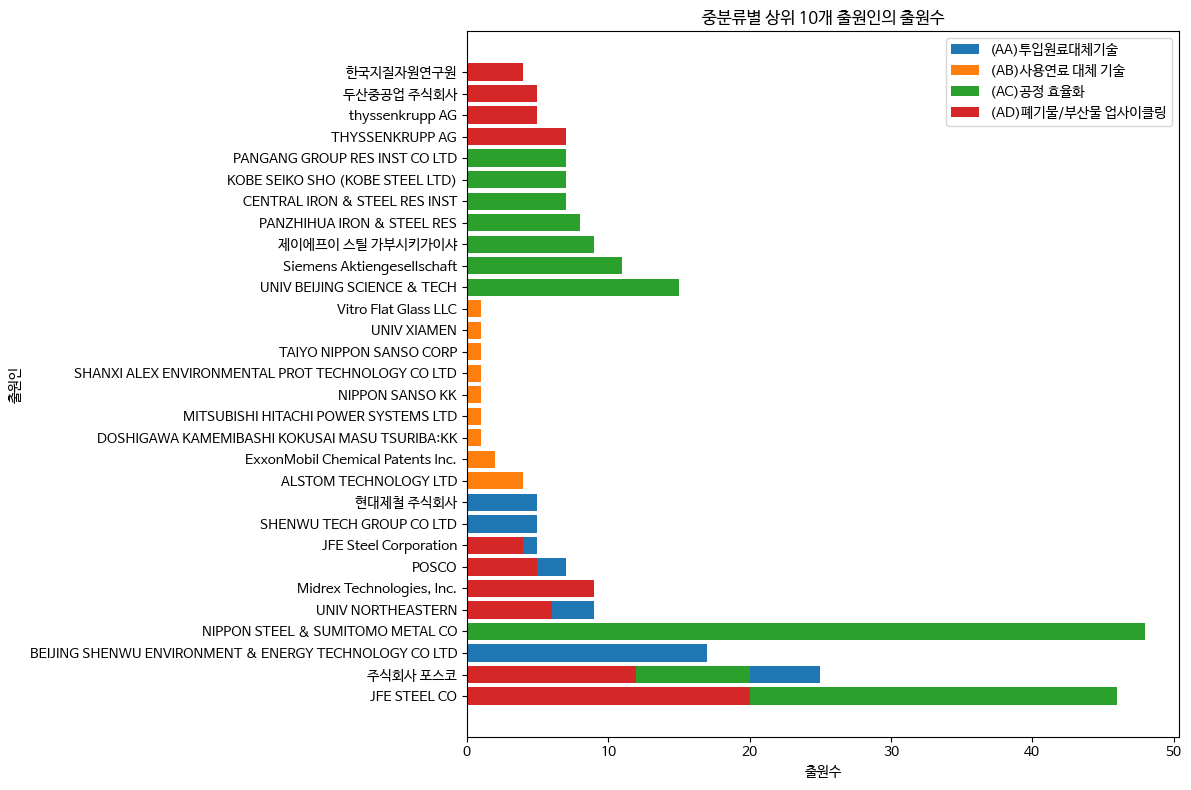

In [13]:
# 중분류를 기준으로 출원인별로 그룹화하고 출원수 세기
grouped = df.groupby(['중분류', '출원인']).size().reset_index(name='출원수')

# 중분류별로 상위 10개의 출원인 선택
top_10_per_group = grouped.groupby('중분류').apply(lambda x: x.nlargest(10, '출원수')).reset_index(drop=True)

# 그래프 그리기
plt.figure(figsize=(12, 8))

for group_name, group_data in top_10_per_group.groupby('중분류'):
    plt.barh(group_data['출원인'], group_data['출원수'], label=group_name)

plt.xlabel('출원수')
plt.ylabel('출원인')
plt.title('중분류별 상위 10개 출원인의 출원수')
plt.legend()
plt.tight_layout()
plt.show()